# 파이썬으로 풀어보는 수학

- 원서명 : Doing Math with Python: Use Programming to Explore Algebra, Statistics, Calculus, and More! (ISBN 9781593276409)
- 지은이 : 아미트 사하(Amit Saha)
- 원서 및 관련자료 : <https://www.nostarch.com/doingmathwithpython>
- 번역서 : <http://www.acornpub.co.kr/book/doing-math-with-python>

![책표지](https://github.com/DevStarSJ/Study/blob/master/Blog/Python/DoingMathWithPython/image/cover.jpg?raw=true)

## 4장 SymPy를 이용한 대수와 부호 수학

지금까지는 수학문제와 풀이에 직접 숫자를 대입하여 풀었습니다.  
하지만 `SymPy`를 이용하여 대수(Algebra)문제를 부호(Symbolic) 수학으로 풀이하는 것이 가능합니다.  

### 1. 부호와 부호 연산 정의

In [1]:
x = 1
x + x + 1

3

SymPy는 수학 수식을 표현하고 계산할 수 있는 기능을 제공해 줍니다.

In [3]:
from sympy import Symbol
x = Symbol('x')
x + x + 1

2*x + 1

In [4]:
expr = x + x + 1
expr.subs({x : 1})

3

`Symbol` 클래스의 인자로 문자열을 전달하여 심볼을 생성합니다.  
심볼을 이용한 수식 과 방정식을 정의 할 수 있습니다.
`subs()` 함수의 인자로 각 심볼별 값을 `Dictionary`로 전달하면 계산을 해 줍니다.

In [4]:
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

심볼을 하나씩 만들어 줄 수도 있지만, `Symbols()` 함수를 사용하여 한 번에 생성할 수도 있습니다.

In [1]:
from sympy import symbols
x, y, z = symbols('x,y,z')

s = x*y + x*y - z * (z + 1)
s

2*x*y - z*(z + 1)

조금 복잡한 수식을 입력하면 정리하지 않은체 그대로 둡니다.

In [7]:
(x + 2) * (x + 3)

(x + 2)*(x + 3)

### 2. 수식 계산

#### 2.1 수식을 요소화, 전개화

수식을 요소화(인수분해) 하고 전개하는 방법을 제공합니다.
- `factor()` : 수식을 요소화(인수분해)를 합니다.
- `expand()` : 수식을 전개합니다.

In [8]:
s = x**2 - y**2
print(s)

x**2 - y**2


In [3]:
from sympy import factor
factor(s)

2*x*y - z**2 - z

In [4]:
s = factor(x**3 - y**3)
s

(x - y)*(x**2 + x*y + y**2)

In [5]:
from sympy import expand
p = expand(s)
p

x**3 - y**3

#### 2.2 보기 좋게 출력
- `pprint()` : 수식을 보기좋게 출력해 줍니다.

In [28]:
from sympy import pprint
pprint(p)

In [29]:
pprint(s)

기본적으로는 높은 자승 순서부터 정렬을 합니다.  
반대로 출력하기 위해서는 `init_printing()` 함수를 이용하여 변경이 가능합니다.

In [12]:
from sympy import init_printing
init_printing(order='rev-lex') # reverse lexicographical order
1 + x/2 + x**2/2

order에 입력가능한 값들에 대해서는 아래 Link를 참조하시면 됩니다.  

<http://docs.sympy.org/dev/modules/physics/vector/api/printing.html>

##### 수열 출력

>$$x + \frac{{x}^{2}}{2} + \frac{{x}^{3}}{3} + ... + \frac{{x}^{n}}{n}$$

위 수열을 생성하는 예제 코드를 살펴보겠습니다.

In [25]:
def make_series(n):
    x = Symbol('x')
    series = x
    for i in range(2, n+1):
        series += (x**i)/i
    return series

init_printing(order='rev-lex') # reverse lexicographical order
make_series(7)

### 3. 값으로 대체

앞에서도 잠깐 나왔는데, `.subs()` 함수에 `심볼 : 값`을 포함한 `Dictionary`를 입력하면 해당 심볼을 값으로 대체 합니다.  
수식의 모든 심볼에 대해서 다 입력해주면 구체적인 값이 나오고, 일부 심볼만 입력할 경우에는 나머지 심볼로 전개됩니다.

In [13]:
init_printing(order='lex') # reverse lexicographical order
e = x*x + x*y + x*y + y*y
e

In [34]:
e.subs({x:1, y:2})

In [35]:
e.subs({x:1})

부호를 다른 부호로 대체도 가능합니다.

In [37]:
expand(e.subs({x:y+1}))

In [14]:
s = e.subs({x:1-y})
s

위 수식을 보면 단순히 x 대신 y-1을 대입한 것이지 수식을 풀이하진 않았습니다.  
`simplify()`함수를 이용하면 간략화해 줍니다.

In [15]:
from sympy import simplify
simplify(s)

앞서 살펴본 수열을 출력하는 함수에 값을 입력해 보겠습니다.

In [45]:
p = make_series(5)
p

In [46]:
p.subs({x:1.2})

### 4. 문자열을 수식으로 변환

`simpify()`함수에 문자열을 전달하면 수식으로 변환해 줍니다.  
다음 수식을 입력해서 변환해 보도록 하겠습니다.  

$${x}^{2} + 3x + {x}^{3} + 2x$$

In [40]:
from sympy import sympify

str = input('Enter a mathematical expression: ')

expr = sympify(str)
expr

Enter a mathematical expression: x**2 + 3*x + x**3 + 2*x


이 수식을 근거로 해서 앞에서 살펴보았던 연산들을 할 수 있습니다.

In [41]:
2*expr

In [42]:
expr *= (x + 3 * x ** 2)
expr

In [43]:
simplify(expr)

`simpify()`에 입력한 문자열이 수식으로 변활할 수 없을 경우 예외가 발생합니다.  
해당 예외에 대해서는 `sympy.core.sympify` 내의 `SympifyError`에 정의되어 있습니다.

In [7]:
from sympy.core.sympify import SympifyError

str = input('Enter a mathematical expression: ')

try:
    expr = sympify(str)
except SympifyError:
    print('Invalid input')

Enter a mathematical expression: x^2 + 3x
Invalid input


### 5. 방정식 풀기

`solve()`함수를 이용하여 방정식의 해를 찾을 수 있습니다.  
해당 수식의 값이 0이 될것이라고 가정을 하고 수식을 계산합니다.

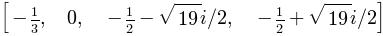

In [31]:
from sympy import solve
solve(expr)

위 9차방정식의 해인데, 이것은 우리가 알아보기 힘드니 좀 더 단순한 수식으로 살펴보겠습니다.

In [44]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x **2 + 2 * x + 1
solve(expr)

In [38]:
expr = x ** 2 + 5 * x + 4
solve(expr, dict=True)

`dict` 인자를 이용하여 `Dictionary` 형식으로도 리턴이 가능합니다.

심볼이 여러개 있을 경우 특정 심볼에 대해서 해를 보고 싶을 경우에는 2번째 인자로 해당 심볼을 적어주면 됩니다.

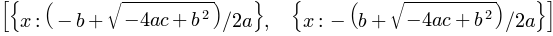

In [47]:
a, b, c = symbols('a,b,c')
expr = a*x*x + b*x +c
d = solve(expr,x, dict=True)
d

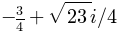

In [48]:
d[0][x].subs({a:2, b:3, c:4})

### 6. 선형 방정식 시스템 풀기
2개의 방정식을 만족하는 한 쌍의 (x, y) 값을 계산하고자 할 경우 `solve()` 메서드에 2개의 방정식을 `Tuple`로 묶어서 인자로 전달하면 됩니다.

2*x + 3*y - 6
3*x + 2*y - 12


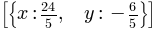

In [51]:
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12
print(expr1)
print(expr2)
s = solve((expr1, expr2), dict=True)
s

위의 해가 맞는지 두 방정식에 각각 대입해 보겠습니다.

In [52]:
expr1.subs({x:s[0][x], y:s[0][y]})

In [53]:
expr2.subs({x:s[0][x], y:s[0][y]})

두 방정식에 대입해서 값이 0으로 나온것으로 봐서 맞게 계산된 것으로 보여집니다.

### 7. SymPy를 사용해 그래프 그리기

`SymPy`로 표현한 직선방정식을 이용하여 그래프를 그릴 수 있습니다.  
2장에서  살펴 본 `matplotlib`을 사용하는 것은 아니며 `SymPy.plotting`를 이용해야 합니다.

In [2]:
%matplotlib inline
import seaborn

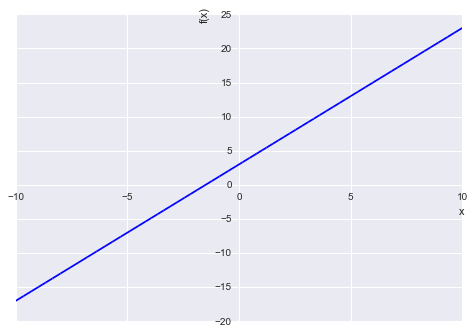

In [3]:
from sympy.plotting import plot
from sympy import Symbol

x = Symbol('x')
plot(2*x + 3)

위 그래프는 x값의 기본 범위를 -10에서 10으로 자동 설정되어 있습니다.  
이 범위를 x축 기준으로 -5에서 5까지 위치하도록 제한하기를 원한다면 `(x, -5, 5)` 라는 튜플을 추가 인자로 전달하면 됩니다.

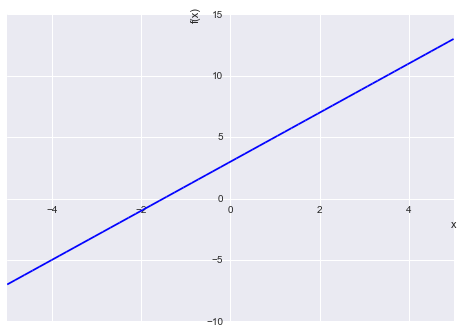

In [4]:
plot(2*x+3, (x, -5, 5))

타이틀, X/Y축 레이블을 입력하고자 할 경우에는 각각 `title`, `xlabel`, `ylabel`을 추가 인자로 전달하면 됩니다.

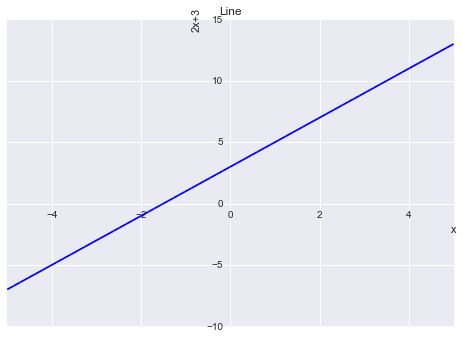

In [5]:
plot(2*x+3, (x, -5, 5), title='Line', xlabel='x', ylabel='2x+3')

그림을 보이지 않게 하고자 할 경우 `show=False`를 인자로 전달하면 됩니다.  
그럴 경우 언제든지 `.show()`메서드를 이용해서 표시할 수 있으며,
이미지로 저장하고 싶은 경우에는 `.save('파일명')` 메서드를 이용하여 가능합니다.

In [7]:
p = plot(2*x+3, (x, -5, 5), title='Line', xlabel='x', ylabel='2x+3', show=False)
p.save('image/ch04.line.png')
p.show()

### 8. 사용자가 입력한 수식을 그래프로 그리기

앞서 `sympify()` 함수를 이용하여 사용자가 입력한 문자열을 수식으로 표현하는 것을 살펴보았습니다.
하지만 그래프로 표현하기 위해서는 해당 수식이 1가지 심볼(예를 들어서 `x`)에 대해서만 전개된 수식이어야 합니다.
만약 수식이 이런 형태가 아니라면 고쳐야 합니다.
`solve()`함수를 이용하면 가능합니다.
`solve()`함수는 앞서 살펴본봐야 같이 해를 찾아주는 함수입니다.
이 함수의 2번째 인자로 `y`를 입력하면 `y`를 풀어서 `x`로 전개합니다.

In [6]:
from sympy import sympify, solve

expr = input('Enter an expression: ')
expr = sympify(expr)
y = Symbol('y')
expr = solve(expr, y)
expr

Enter an expression: 2*x + 3*y + 6


[-2*x/3 - 2]

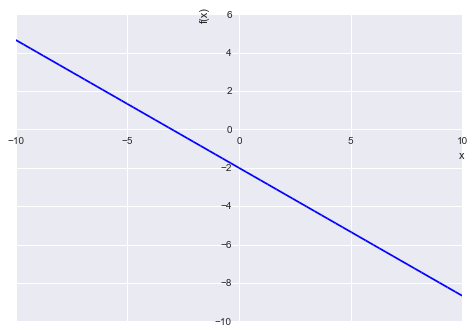

In [7]:
plot(expr[0])

### 9. 여러 함수 그래프 그리기

`plot()`의 인자로 여러개의 수식을 전달하면 됩니다.

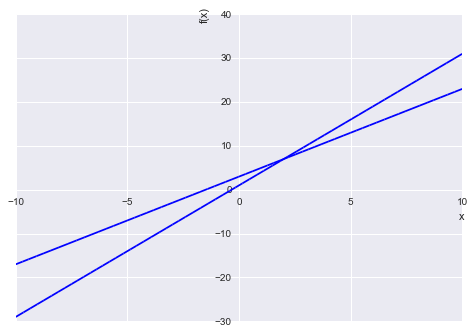

In [8]:
plot(2*x + 3, 3*x + 1)

`matplotlib`에서는 자동으로 각각 다른 색상의 라인이 출력되었는데, `SymPy`에서는 같은 색으로 출력됩니다.
다른 색으로 출력해주기 위해서는 몇가지 단계를 더 추가해 줘야 합니다.

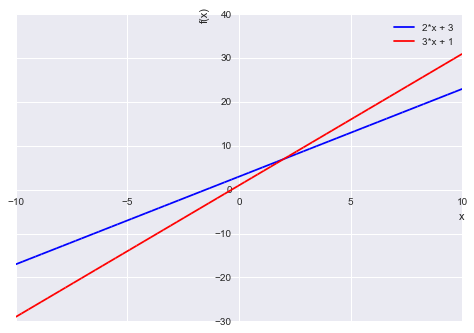

In [9]:
p = plot(2*x + 3, 3*x + 1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

## 프로그래밍 연습

- 책에 있는 연습 문제 중에 앞에서 이미 작성한 내용으로만 해결이 가능한 경우는 해당 문제 풀이를 생략하였습니다.
- Product Code가 아닌 연습문제용으로써, 예외 처리 등에 대한 것은 최대한 생략하고 문제 자체에 대한 로직만을 간략하게 표현하였습니다.

### 1. 그래프를 이용한 방정식 풀기

2개의 수식을 입력받아서 그래프로 표시하고, 공통 해를 출력하세요.

Enter your first expression im terms of x and y : 2*x + 3*y +6
Enter your second expression im terms of x and y : 3*x -y +1
solve :  [{y: -16/11, x: -9/11}]


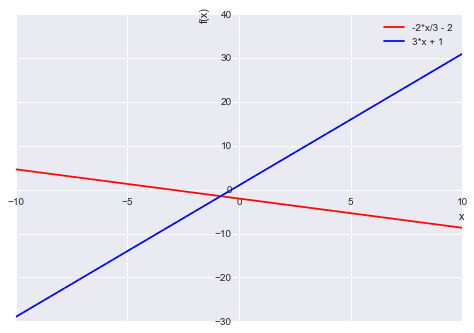

In [10]:
expr1 = input('Enter your first expression im terms of x and y : ')
expr2 = input('Enter your second expression im terms of x and y : ')

expr1 = sympify(expr1)
expr2 = sympify(expr2)

print('solve : ', solve((expr1, expr2), dict=True))

expr1 = solve(expr1,y)[0]
expr2 = solve(expr2,y)[0]

p = plot(expr1, expr2, legend=True, show=False)
p[0].line_color = 'r'
p[1].line_color = 'b'
p.show()

### 2. 수열합 계산

앞서 살펴본 `make_series()` 함수와 같이 수열을 만들어주는 기능을 `SymPy`에서 제공합니다.
`summation()` 함수에 첫번째 인자로 n번째 수열을 정의해 주고, 두번째 인자로 n의 범위를 지정해주면 해당 수열을 생성해 줍니다.

In [11]:
from sympy import Symbol,symbols, summation, pprint

x, n = symbols('x,n')
s = summation(x**n/n, (n, 1, 5))
pprint(s)

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     


이렇게 만들어진 수열에 `.subs()` 삼수를 이용하여 `x`의 값을 대체하면 수열의 합이 계산됩니다.

In [24]:
s.subs({x:1.2})

3.51206400000000

이를 이용하여 n번째 항에 대한 정의와 몇개의 수열을 생성할 것인지를 입력받아서 해당 수열을 출력하세요.

In [26]:
expr = input('Enter the nth term : ')
num = int(input('Enter the number of terms : '))
n = Symbol('n')

s = summation(sympify(expr), (n, 1, num))
pprint(s)

Enter the nth term : a+(n-1)*d
Enter the number of terms : 3
3⋅a + 3⋅d


### 3. 단일 변수의 부동식 풀기

`SymPy`의 `solve()`를 이용해서 방정식의 해를 풀 수 있는 것을 확인했습니다.
등식뿐만 아니라 `x+5 > 3`, `sinx - 0.6 > 0`과 같은 부등식도 해결할 수 있는 방법도 제공하고 있습니다.

부등식의 3가지 유형과 풀이하는 방법에 대해서 살펴보겠습니다.


먼저, 다항부등식을 풀기 위해서는 `solve_poly_inequality()`함수를 사용합니다.

In [3]:
from sympy import Poly, Symbol, solve_poly_inequality

x = Symbol('x')
e = -x**2 + 4 < 0
lhs = e.lhs
p = Poly(lhs, x)
rel = e.rel_op
solve_poly_inequality(p, rel)

[(-oo, -2), (2, oo)]

1. 먼저 부등식 `e`를 생성합니다.
2. `lhs`속성을 이용해 부등식의 왼쪽을 추출합니다.
3. 추출된 다항식을 표현하기위해 `Poly` 객체를 생성합니다.
4. `rel`속성을 이용해 `비교 연산자`를 추출합니다.
5. `Poly`객체와 관계 연산자 `rel`을 인자로하여 `solve_poly_inequality()`함수를 호출합니다.

그러면 튜플 리스트로 해를 리턴합니다.

두번째로, 논리적 표현(Rational expression)은 대수 수식으로 연산자와 피연산자 모두 다항식인 것을 말합니다.
논리적 부등식을 풀기 위해서는 `solve_rational_inequalities()` 함수를 사용합니다.


In [5]:
from sympy import Poly, Symbol, solve_rational_inequalities

e = ((x-1)/(x+2)) > 0
lhs = e.lhs
numer, denom = lhs.as_numer_denom()
p1 = Poly(numer)
p2 = Poly(denom)
rel = e.rel_op
solve_rational_inequalities([[((p1, p2), rel)]])

(-oo, -2) U (1, oo)

위의 부등식과 다른 점에 대해서만 설명 드리겠습니다.

`numer(분자)`와 `denom(분모)`로 이루어진 튜플로 분리합니다.
이 두 개를 각각 `p1, p2의 다항식 객체`로 생성한 다음, `비교연산자`와 함께 `solve_rational_inequalities()` 함수의 인자로 전달합니다.

마지막으로, `sinx - 0.6 > 0`은 다항 또는 관계 방정식 부류에 속하지 않는 부등식의 예 입니다.
이러한 부등식을 풀려면 `solve_univariate_inequality()` 함수를 사용해야 합니다.

In [9]:
from sympy import Poly, solve, solve_univariate_inequality, sin

e = sin(x) - 0.6 > 0
solve_univariate_inequality(e, x)

And(0.643501108793284 < x, x < 2.49809154479651)

In [10]:
solve_univariate_inequality(e, x, relational=False)

(0.643501108793284, 2.49809154479651)

1. 이 3가지 모든 기능을 다 취할수 있는 `isolve()`함수를 생성하시고,
2. 부등식을 풀고 해를 리턴하는 함수를 구현하세요.

In [14]:
from sympy import Poly, Symbol, sympify, solve_poly_inequality, solve_rational_inequalities, solve_univariate_inequality, pprint

def isolve(strEquation):
    x = Symbol('x')   
    e = sympify(strEquation)
    
    if e.is_polynomial():
        lhs = e.lhs
        p = Poly(lhs, x)
        rel = e.rel_op
        pprint(solve_poly_inequality(p, rel))
    elif e.is_rational_function():
        lhs = e.lhs
        numer, denom = lhs.as_numer_denom()
        p1 = Poly(numer)
        p2 = Poly(denom)
        rel = e.rel_op
        pprint(solve_rational_inequalities([[((p1, p2), rel)]]))
    else:
        pprint(solve_univariate_inequality(e, x))

isolve('x**2-4 < 0')

-2 < x ∧ x < 2


In [15]:
isolve('(2+x)/(3+x) > 0')

(-∞ < x ∧ x < -3) ∨ (-2 < x ∧ x < ∞)


In [18]:
isolve('-1.5 + 2*sin(x) > 0')

0.848062078981481 < x ∧ x < 2.29353057460831
